In [77]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
get_ipython().magic('matplotlib inline')
import warnings 
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
import numpy as np
from nltk.tokenize.treebank import TreebankWordDetokenizer
tbd = TreebankWordDetokenizer()
import string
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import f1_score as f1
from sklearn.ensemble import RandomForestClassifier

In [82]:
df_train = pd.read_csv('C:/Users/Dell/Downloads/brain_waves/train.csv')

In [88]:
df_train.head(40)

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Complaint-Status,Consumer-disputes,Consumer-complaint-summary
0,Tr-1,11/11/2015,Mortgage,"Loan servicing, payments, escrow account",NaN,11/11/2015,Closed with explanation,Yes,"Seterus, Inc a déposé un faux rapport auprès d..."
1,Tr-2,7/7/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,7/7/2015,Closed with non-monetary relief,No,XX / XX / XXXX La requête en faillite n ° XXXX...
2,Tr-3,5/7/2015,Bank account or service,Using a debit or ATM card,NaN,5/7/2015,Closed with explanation,No,"El XXXX / XXXX / 15, estaba preparando el vuel..."
3,Tr-4,11/12/2016,Debt collection,Cont'd attempts collect debt not owed,Company believes it acted appropriately as aut...,11/12/2016,Closed with explanation,No,"The loan was paid in XXXX XXXX. In XXXX, 4 yea..."
4,Tr-5,9/29/2016,Credit card,Payoff process,Company has responded to the consumer and the ...,9/29/2016,Closed with explanation,No,J'ai obtenu un compte de crédit de soins pour ...
5,Tr-6,8/2/2016,Mortgage,"Loan modification,collection,foreclosure",NaN,8/3/2016,Closed with explanation,Yes,The owner of my original mortgage filed for ba...
6,Tr-7,3/26/2017,Credit reporting,Incorrect information on credit report,NaN,3/26/2017,Closed with explanation,No,J'ai été victime d'une fraude d'identité et j'...
7,Tr-8,10/15/2016,Bank account or service,Problems caused by my funds being low,Company has responded to the consumer and the ...,10/15/2016,Closed with explanation,No,"Je suis en train de faire faillite et, par con..."
8,Tr-9,1/18/2016,Debt collection,Cont'd attempts collect debt not owed,NaN,1/18/2016,Closed with explanation,Yes,Una agencia de cobranza me hizo adulterar de q...
9,Tr-10,8/17/2015,Credit reporting,Incorrect information on credit report,Company chooses not to provide a public response,8/17/2015,Closed with non-monetary relief,No,"Le XXXX / XXXX / 2015, j'ai reçu une réponse d..."


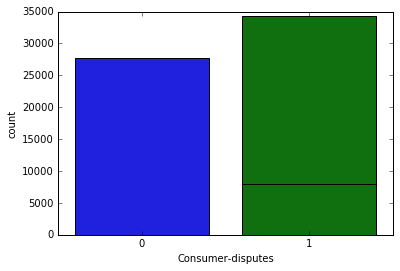

In [16]:
df = pd.read_csv('C:/Users/Dell/Downloads/brain_waves/train.csv')
df.head()



df['Transaction-Type'].value_counts()



from sklearn.preprocessing import LabelEncoder  
number = LabelEncoder()
df['Transaction-Type'] = number.fit_transform(df['Transaction-Type'])
df['Transaction-Type'].head()



sns.countplot(x='Transaction-Type' , data = df)



df['Company-response'].value_counts()



df['Complaint-Status'].value_counts()


df['Complaint-Status'] = number.fit_transform(df['Complaint-Status'])
df['Complaint-Status'].head()



sns.countplot(x='Complaint-Status' , data = df)



mask = ~df['Company-response'].isnull()
df['Company-response'][mask] = number.fit_transform(df['Company-response'][mask])



sns.countplot(data=df,x='Company-response')



from sklearn.preprocessing import Imputer
imp1 = Imputer(strategy = 'most_frequent')
df[['Company-response']] = imp1.fit_transform(df[['Company-response']])
sns.countplot(x='Company-response' , data = df)



df['Complaint-reason']= number.fit_transform(df['Complaint-reason'])
df['Complaint-reason'].head()



mask = ~df['Consumer-disputes'].isnull()
df['Consumer-disputes'][mask] = number.fit_transform(df['Consumer-disputes'][mask])
sns.countplot(data=df,x='Consumer-disputes') 



df[['Consumer-disputes']] = imp1.fit_transform(df[['Consumer-disputes']])
df['Consumer-disputes'].head()



type(df)
corr = df.corr()
corr.style.background_gradient()



df.drop(['Date-sent-to-company','Date-received'],inplace = True,axis=1)


df['Consumer-complaint-summary'] = df['Consumer-complaint-summary'].str.replace("[^a-zA-Z#]", " ") #removing special characters
df.head() 


bow_vectorizer = TfidfVectorizer(max_features = 20, min_df = 1, stop_words = 'english')

cv_matrix = bow_vectorizer.fit_transform(df.iloc[:, 6])

ser = pd.DataFrame(cv_matrix.toarray())

df_final = pd.concat([df, ser], axis = 1)

In [106]:
df_final.head()

,Complaint-ID,Transaction-Type,Complaint-reason,Company-response,Complaint-Status,Consumer-disputes,Consumer-complaint-summary,0,1,2,...,10,11,12,13,14,15,16,17,18,19
0,Tr-1,10,78,9.0,1,1.0,Seterus Inc a d pos un faux rapport aupr s d...,0.000000,0.000000,0.0,...,0.548322,0.381865,0.000000,0.000000,0.000000,0.435754,0.000000,0.000000,0.000000,0.398165
1,Tr-2,5,71,7.0,3,0.0,XX XX XXXX La requ te en faillite n XXXX...,0.000000,0.000000,0.0,...,0.189403,0.098929,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.531329,0.783954
2,Tr-3,0,145,9.0,1,0.0,El XXXX XXXX estaba preparando el vuel...,0.000000,0.000000,0.0,...,0.090250,0.000000,0.000000,0.444845,0.000000,0.555846,0.069802,0.120838,0.000000,0.422702
3,Tr-4,7,36,4.0,1,0.0,The loan was paid in XXXX XXXX In XXXX yea...,0.306001,0.000000,0.0,...,0.000000,0.000000,0.187372,0.000000,0.089776,0.000000,0.000000,0.000000,0.170450,0.913314
4,Tr-5,3,100,9.0,1,0.0,J ai obtenu un compte de cr dit de soins pour ...,0.000000,0.621681,0.0,...,0.101367,0.264730,0.000000,0.000000,0.000000,0.161114,0.000000,0.000000,0.000000,0.176659


In [38]:
X = pd.DataFrame(X)

In [39]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43266 entries, 0 to 43265
Data columns (total 24 columns):
0     43266 non-null float64
1     43266 non-null float64
2     43266 non-null float64
3     43266 non-null float64
4     43266 non-null float64
5     43266 non-null float64
6     43266 non-null float64
7     43266 non-null float64
8     43266 non-null float64
9     43266 non-null float64
10    43266 non-null float64
11    43266 non-null float64
12    43266 non-null float64
13    43266 non-null float64
14    43266 non-null float64
15    43266 non-null float64
16    43266 non-null float64
17    43266 non-null float64
18    43266 non-null float64
19    43266 non-null float64
20    43266 non-null float64
21    43266 non-null float64
22    43266 non-null float64
23    43266 non-null float64
dtypes: float64(24)
memory usage: 7.9 MB


In [36]:
X = df_final.drop(['Complaint-ID', 'Complaint-Status', 'Consumer-complaint-summary'], axis = 1).values
y = df['Complaint-Status'] 

In [42]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state = 1)


In [43]:
lr = LogisticRegression(random_state = 1)
lr.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=1, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
f1(y_test, lr.predict(X_test), average = 'micro')

0.7896764252696455

In [78]:
lr = RandomForestClassifier(n_estimators = 50, random_state = 1)

In [79]:
lr.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [49]:
df_test = pd.read_csv('C:/Users/Dell/Downloads/brain_waves/test.csv')
df_test.head()

,Complaint-ID,Date-received,Transaction-Type,Complaint-reason,Company-response,Date-sent-to-company,Consumer-disputes,Consumer-complaint-summary
0,Te-1,8/18/2016,Bank account or service,"Account opening, closing, or management",Company has responded to the consumer and the ...,8/18/2016,No,XXXX / XXXX / 16 I called Citibank to open a c...
1,Te-2,4/18/2016,Debt collection,Communication tactics,Company believes it acted appropriately as aut...,4/20/2016,No,I'm struggling financially. I called and I off...
2,Te-3,3/23/2016,Credit reporting,Incorrect information on credit report,NaN,3/23/2016,No,"In XXXX of 2015, an automatic payment was conf..."
3,Te-4,6/26/2017,Student loan,Dealing with your lender or servicer,NaN,6/26/2017,NaN,"I submitted a request to XXXX, which is my cur..."
4,Te-5,5/13/2016,Credit reporting,Incorrect information on credit report,Company has responded to the consumer and the ...,5/13/2016,No,A state tax lien was filed against me XXXX / X...


In [50]:
df_test['Transaction-Type'] = number.fit_transform(df_test['Transaction-Type'])

In [52]:
mask = ~df_test['Company-response'].isnull()
df_test['Company-response'][mask] = number.fit_transform(df_test['Company-response'][mask])

In [53]:
df_test[['Company-response']] = imp1.fit_transform(df_test[['Company-response']])

In [54]:
df_test['Complaint-reason']= number.fit_transform(df_test['Complaint-reason'])

In [55]:
mask = ~df_test['Consumer-disputes'].isnull()
df_test['Consumer-disputes'][mask] = number.fit_transform(df_test['Consumer-disputes'][mask])

In [56]:
df_test[['Consumer-disputes']] = imp1.fit_transform(df_test[['Consumer-disputes']])

In [57]:
df_test.drop(['Date-sent-to-company','Date-received'],inplace = True,axis=1)

In [58]:
df_test['Consumer-complaint-summary'] = df_test['Consumer-complaint-summary'].str.replace("[^a-zA-Z#]", " ") #removing special characters

In [61]:
df_test.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,Consumer-complaint-summary
0,0,1,9.0,0.0,XXXX XXXX I called Citibank to open a c...
1,7,32,4.0,0.0,I m struggling financially I called and I off...
2,5,69,9.0,0.0,In XXXX of an automatic payment was conf...
3,15,48,9.0,0.0,I submitted a request to XXXX which is my cur...
4,5,69,9.0,0.0,A state tax lien was filed against me XXXX X...


In [60]:
df_test.drop(['Complaint-ID'], inplace = True, axis = 1)

In [62]:
cv_matrix = bow_vectorizer.fit_transform(df_test.iloc[:, 4])

In [63]:
ser = pd.DataFrame(cv_matrix.toarray())

In [64]:
df_test_final = pd.concat([df_test, ser], axis = 1)

In [65]:
df_test_final.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,Consumer-complaint-summary,0,1,2,3,4,...,10,11,12,13,14,15,16,17,18,19
0,0,1,9.0,0.0,XXXX XXXX I called Citibank to open a c...,0.676664,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.132088,0.0,0.0,0.0,0.500323,0.523789
1,7,32,4.0,0.0,I m struggling financially I called and I off...,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.915111,0.0,0.0,0.0,0.000000,0.403203
2,5,69,9.0,0.0,In XXXX of an automatic payment was conf...,0.095090,0.0,0.0,0.0,0.429611,...,0.0,0.0,0.000000,0.0,0.779609,0.0,0.0,0.0,0.210928,0.392571
3,15,48,9.0,0.0,I submitted a request to XXXX which is my cur...,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.252421,0.0,0.000000,0.0,0.0,0.0,0.000000,0.967618
4,5,69,9.0,0.0,A state tax lien was filed against me XXXX X...,0.000000,0.0,0.0,0.0,0.504078,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.863658


In [68]:
df_test_final.drop(['Consumer-complaint-summary'], axis = 1, inplace = 1)

In [69]:
df_test_final.head()

,Transaction-Type,Complaint-reason,Company-response,Consumer-disputes,0,1,2,3,4,5,...,10,11,12,13,14,15,16,17,18,19
0,0,1,9.0,0.0,0.676664,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.132088,0.0,0.0,0.0,0.500323,0.523789
1,7,32,4.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.915111,0.0,0.0,0.0,0.000000,0.403203
2,5,69,9.0,0.0,0.095090,0.0,0.0,0.0,0.429611,0.0,...,0.0,0.0,0.000000,0.0,0.779609,0.0,0.0,0.0,0.210928,0.392571
3,15,48,9.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.252421,0.0,0.000000,0.0,0.0,0.0,0.000000,0.967618
4,5,69,9.0,0.0,0.000000,0.0,0.0,0.0,0.504078,0.0,...,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.863658


In [70]:
X = df_test_final

In [80]:
pred = lr.predict(X)

In [75]:
df_test = pd.read_csv('C:/Users/Dell/Downloads/brain_waves/test.csv')

In [93]:
pred

array([3, 1, 1, ..., 1, 1, 1], dtype=int64)

In [92]:
pred = lr.predict(X)

In [100]:
len(pred)

18543

In [101]:
pred_str = []

In [102]:
for i in range(len(pred)):
    if pred[i] == 0:
        pred_str.append('Closed')
    elif pred[i] == 1:
        pred_str.append('Closed with explanation')
    elif pred[i] == 2:
        pred_str.append('Closed with monetary relief')
    elif pred[i] == 3:
        pred_str.append('Closed with non-monetary relief')
    elif pred[i] == 4:
        pred_str.append('Untimely response')

In [103]:
len(pred_str)

18543

In [104]:
X.shape[0]

18543

In [105]:
pd.DataFrame({"Complaint-ID": df_test.iloc[:, 0], "Complaint-Status": pred_str}).to_csv('brainwaves.csv', index = None)